In [26]:
# %% [markdown]
# # N-gram Code Token Recommender for Java
# Simple implementation for code completion using N-gram models

# %% [markdown]
# ## 1. Setup

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import warnings
warnings.filterwarnings('ignore')

# Import our modules
from models.ngram_model import NGramModel
from utils.evaluation import calculate_perplexity, evaluate_topk_accuracy

# Set random seed
np.random.seed(42)
random.seed(42)

print("Setup complete!")

Setup complete!


In [27]:
# %% [markdown]
# ## 2. Load Data

# %%
# Load your preprocessed data
df = pd.read_csv('data/java_methods_dataset.csv')

# Separate train and test splits
train_df = df[df['dataset_split'] == 'train']
test_df = df[df['dataset_split'] == 'test']

print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")

# Display available metrics that we can use for analysis
print(f"\nAvailable metrics columns:")
metric_cols = [col for col in train_df.columns if col.startswith('metrics_')]
for col in metric_cols:
    print(f"  - {col}")

Training samples: 19998
Test samples: 5000

Available metrics columns:
  - metrics_cyclomatic_complexity
  - metrics_n_ast_nodes
  - metrics_ast_depth
  - metrics_n_identifiers
  - metrics_vocab_size
  - metrics_n_whitespaces
  - metrics_n_words
  - metrics_nloc
  - metrics_token_counts


In [28]:
# %% [markdown]
# ## 3. Experiment Configuration

# %%
# Define configurations to test
configurations = [
    {'n': 3, 'smoothing': 'none'},
    {'n': 3, 'smoothing': 'laplace'},
    {'n': 3, 'smoothing': 'add-k', 'k': 0.1},
    {'n': 3, 'smoothing': 'add-k', 'k': 0.5},
    
    {'n': 5, 'smoothing': 'none'},
    {'n': 5, 'smoothing': 'laplace'},
    {'n': 5, 'smoothing': 'add-k', 'k': 0.1},
    
    {'n': 7, 'smoothing': 'laplace'},
    {'n': 7, 'smoothing': 'add-k', 'k': 0.1},
    
    {'n': 11, 'smoothing': 'laplace'},
]

print(f"Will test {len(configurations)} configurations")

Will test 10 configurations


In [29]:
# %% [markdown]
# ## 4. Run Experiments

# %%
results = []

for config in configurations:
    print(f"\n{'='*50}")
    print(f"Testing N={config['n']} with {config['smoothing']} smoothing")
    if 'k' in config:
        print(f"k = {config['k']}")
    print('-'*50)
    
    # Create and train model
    model = NGramModel(
        n=config['n'], 
        smoothing=config['smoothing'],
        k=config.get('k', 1.0)
    )
    model.train(train_df)
    
    # Calculate perplexity
    perplexity = calculate_perplexity(model, test_df.head(500))
    print(f"Perplexity: {perplexity:.2f}")
    
    # Calculate top-k accuracy
    accuracy = evaluate_topk_accuracy(model, test_df.head(200))
    print(f"Top-1 Accuracy: {accuracy['top1_accuracy']*100:.2f}%")
    print(f"Top-3 Accuracy: {accuracy['top3_accuracy']*100:.2f}%")
    print(f"Top-5 Accuracy: {accuracy['top5_accuracy']*100:.2f}%")
    
    # Store results
    results.append({
        'n': config['n'],
        'smoothing': config['smoothing'],
        'k': config.get('k', '-'),
        'perplexity': perplexity,
        'top1_acc': accuracy['top1_accuracy'],
        'top3_acc': accuracy['top3_accuracy'],
        'top5_acc': accuracy['top5_accuracy']
    })


Testing N=3 with none smoothing
--------------------------------------------------
Training 3-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 748.91


Evaluating: 100%|██████████| 200/200 [00:02<00:00, 81.26it/s]


Top-1 Accuracy: 50.42%
Top-3 Accuracy: 68.22%
Top-5 Accuracy: 72.78%

Testing N=3 with laplace smoothing
--------------------------------------------------
Training 3-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 2358.48


Evaluating: 100%|██████████| 200/200 [00:02<00:00, 66.87it/s]


Top-1 Accuracy: 50.42%
Top-3 Accuracy: 68.22%
Top-5 Accuracy: 72.78%

Testing N=3 with add-k smoothing
k = 0.1
--------------------------------------------------
Training 3-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 676.21


Evaluating: 100%|██████████| 200/200 [00:02<00:00, 66.92it/s]


Top-1 Accuracy: 50.42%
Top-3 Accuracy: 68.22%
Top-5 Accuracy: 72.78%

Testing N=3 with add-k smoothing
k = 0.5
--------------------------------------------------
Training 3-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 1590.81


Evaluating: 100%|██████████| 200/200 [00:03<00:00, 65.49it/s]


Top-1 Accuracy: 50.42%
Top-3 Accuracy: 68.22%
Top-5 Accuracy: 72.78%

Testing N=5 with none smoothing
--------------------------------------------------
Training 5-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 45018.42


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 334.12it/s]


Top-1 Accuracy: 63.62%
Top-3 Accuracy: 74.79%
Top-5 Accuracy: 77.54%

Testing N=5 with laplace smoothing
--------------------------------------------------
Training 5-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 16774.94


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 261.75it/s]


Top-1 Accuracy: 63.62%
Top-3 Accuracy: 74.79%
Top-5 Accuracy: 77.54%

Testing N=5 with add-k smoothing
k = 0.1
--------------------------------------------------
Training 5-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 5767.85


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 272.96it/s]


Top-1 Accuracy: 63.62%
Top-3 Accuracy: 74.79%
Top-5 Accuracy: 77.54%

Testing N=7 with laplace smoothing
--------------------------------------------------
Training 7-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 38830.59


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 448.50it/s]


Top-1 Accuracy: 72.07%
Top-3 Accuracy: 79.67%
Top-5 Accuracy: 81.49%

Testing N=7 with add-k smoothing
k = 0.1
--------------------------------------------------
Training 7-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 17539.38


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 396.37it/s]


Top-1 Accuracy: 72.07%
Top-3 Accuracy: 79.67%
Top-5 Accuracy: 81.49%

Testing N=11 with laplace smoothing
--------------------------------------------------
Training 11-gram model...
Training complete. Vocabulary size: 95438
Perplexity: 61109.71


Evaluating: 100%|██████████| 200/200 [00:00<00:00, 409.73it/s]

Top-1 Accuracy: 82.50%
Top-3 Accuracy: 86.66%
Top-5 Accuracy: 87.42%


In [30]:
# %% [markdown]
# ## 5. Results Summary

# %%
# Create results dataframe
results_df = pd.DataFrame(results)

# Display results table
print("\nEXPERIMENT RESULTS")
print("="*80)
print(results_df.to_string(index=False))

# Find best configurations
best_perp = results_df.loc[results_df['perplexity'].idxmin()]
best_acc = results_df.loc[results_df['top1_acc'].idxmax()]

print(f"\n🏆 Best Configurations:")
print(f"Lowest Perplexity: N={best_perp['n']}, {best_perp['smoothing']} (Perplexity: {best_perp['perplexity']:.2f})")
print(f"Highest Accuracy: N={best_acc['n']}, {best_acc['smoothing']} (Top-1: {best_acc['top1_acc']*100:.2f}%)")


EXPERIMENT RESULTS
 n smoothing    k   perplexity  top1_acc  top3_acc  top5_acc
 3      none    -   748.912441  0.504159  0.682218  0.727788
 3   laplace    -  2358.481524  0.504159  0.682218  0.727788
 3     add-k  0.1   676.211303  0.504159  0.682218  0.727788
 3     add-k  0.5  1590.806116  0.504159  0.682218  0.727788
 5      none    - 45018.423442  0.636192  0.747879  0.775369
 5   laplace    - 16774.940610  0.636192  0.747879  0.775369
 5     add-k  0.1  5767.850406  0.636192  0.747879  0.775369
 7   laplace    - 38830.586214  0.720743  0.796698  0.814861
 7     add-k  0.1 17539.380017  0.720743  0.796698  0.814861
11   laplace    - 61109.709961  0.825030  0.866646  0.874241

🏆 Best Configurations:
Lowest Perplexity: N=3, add-k (Perplexity: 676.21)
Highest Accuracy: N=11, laplace (Top-1: 82.50%)


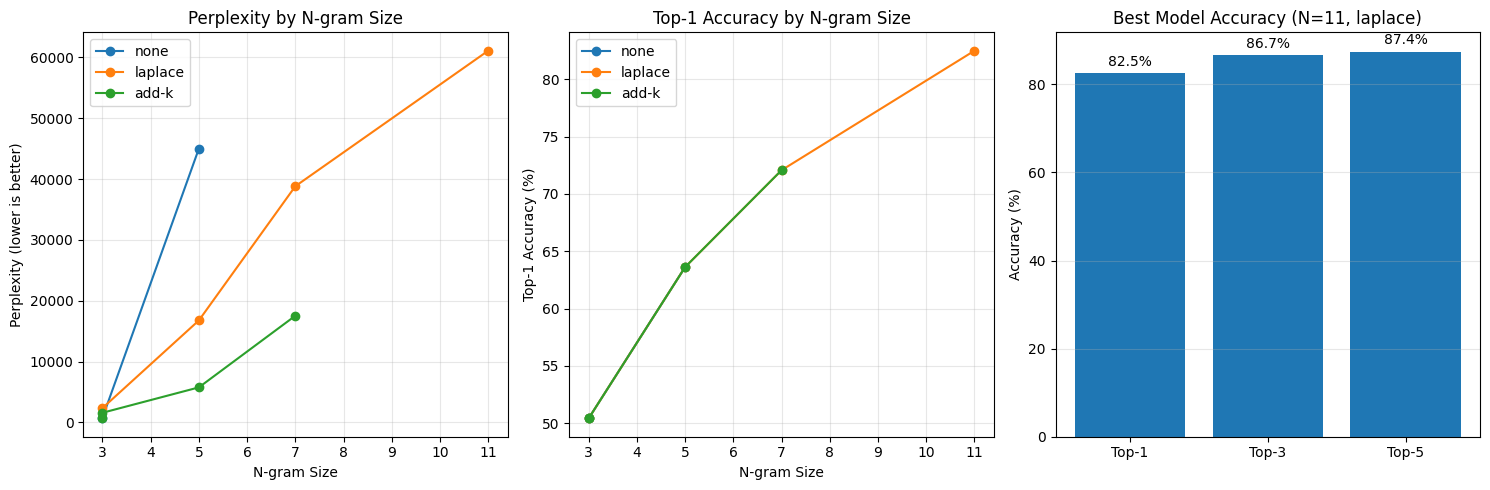

In [31]:
# %% [markdown]
# ## 6. Visualize Results

# %%
# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Perplexity by N
ax1 = axes[0]
for smoothing in results_df['smoothing'].unique():
    data = results_df[results_df['smoothing'] == smoothing]
    ax1.plot(data['n'], data['perplexity'], marker='o', label=smoothing)
ax1.set_xlabel('N-gram Size')
ax1.set_ylabel('Perplexity (lower is better)')
ax1.set_title('Perplexity by N-gram Size')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Top-1 Accuracy by N
ax2 = axes[1]
for smoothing in results_df['smoothing'].unique():
    data = results_df[results_df['smoothing'] == smoothing]
    ax2.plot(data['n'], data['top1_acc']*100, marker='o', label=smoothing)
ax2.set_xlabel('N-gram Size')
ax2.set_ylabel('Top-1 Accuracy (%)')
ax2.set_title('Top-1 Accuracy by N-gram Size')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Accuracy comparison for best model
ax3 = axes[2]
accuracies = [best_acc['top1_acc'], best_acc['top3_acc'], best_acc['top5_acc']]
labels = ['Top-1', 'Top-3', 'Top-5']
bars = ax3.bar(labels, [a*100 for a in accuracies])
ax3.set_ylabel('Accuracy (%)')
ax3.set_title(f'Best Model Accuracy (N={int(best_acc["n"])}, {best_acc["smoothing"]})')
ax3.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar, val in zip(bars, accuracies):
    ax3.text(bar.get_x() + bar.get_width()/2, val*100 + 1, 
            f'{val*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



Performance by Code Complexity
Training 11-gram model...
Training complete. Vocabulary size: 95438


Evaluating: 100%|██████████| 50/50 [00:00<00:00, 434.43it/s]

     complexity  samples  top1_acc  top5_acc
      Low (1-2)       50 83.922046 88.550548
   Medium (3-5)       50 85.188867 89.463221
    High (6-10)       50 77.388535 82.484076
Very High (>10)       50 73.440000 82.080000


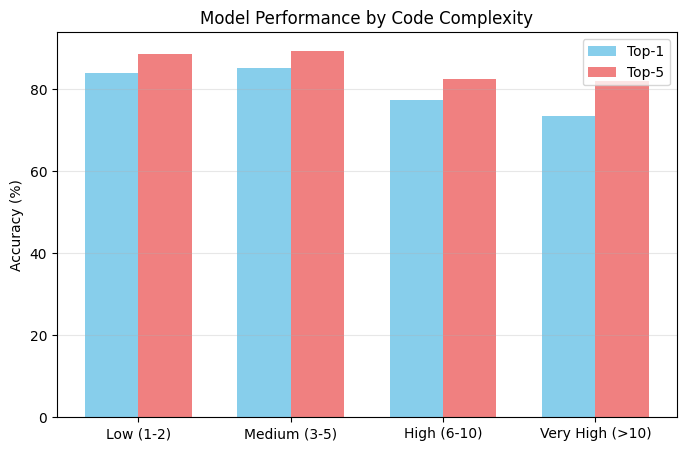

In [32]:
# %% [markdown]
# ## 7. Performance by Code Complexity

# %%
# Analyze performance by complexity
print("\nPerformance by Code Complexity")
print("="*50)

# Train best model
best_model = NGramModel(
    n=int(best_acc['n']), 
    smoothing=best_acc['smoothing'],
    k=0.1 if best_acc['smoothing'] == 'add-k' else 1.0
)
best_model.train(train_df)

# Group test data by complexity
complexity_levels = pd.cut(
    test_df['metrics_cyclomatic_complexity'], 
    bins=[0, 2, 5, 10, float('inf')],
    labels=['Low (1-2)', 'Medium (3-5)', 'High (6-10)', 'Very High (>10)']
)

complexity_results = []
for level in ['Low (1-2)', 'Medium (3-5)', 'High (6-10)', 'Very High (>10)']:
    level_df = test_df[complexity_levels == level].head(50)
    if len(level_df) > 0:
        accuracy = evaluate_topk_accuracy(best_model, level_df)
        complexity_results.append({
            'complexity': level,
            'samples': len(level_df),
            'top1_acc': accuracy['top1_accuracy']*100,
            'top5_acc': accuracy['top5_accuracy']*100
        })

complexity_df = pd.DataFrame(complexity_results)
print(complexity_df.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
x = range(len(complexity_df))
width = 0.35
ax.bar([i - width/2 for i in x], complexity_df['top1_acc'], width, label='Top-1', color='skyblue')
ax.bar([i + width/2 for i in x], complexity_df['top5_acc'], width, label='Top-5', color='lightcoral')
ax.set_xticks(x)
ax.set_xticklabels(complexity_df['complexity'])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Performance by Code Complexity')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.show()


In [33]:
# %% [markdown]
# ## 8. Large-Scale Evaluation (1000+ samples)

# %%
print("\n🚀 Large-Scale Evaluation on 1000 Test Samples")
print("="*60)

# Evaluate on 1000 samples
large_scale_accuracy = evaluate_topk_accuracy(best_model, test_df.head(1000))

print(f"Top-1 Accuracy: {large_scale_accuracy['top1_accuracy']*100:.2f}%")
print(f"Top-3 Accuracy: {large_scale_accuracy['top3_accuracy']*100:.2f}%")
print(f"Top-5 Accuracy: {large_scale_accuracy['top5_accuracy']*100:.2f}%")
print(f"Total predictions evaluated: {large_scale_accuracy['total_predictions']:,}")


🚀 Large-Scale Evaluation on 1000 Test Samples


Evaluating: 100%|██████████| 1000/1000 [00:02<00:00, 416.71it/s]

Top-1 Accuracy: 82.82%
Top-3 Accuracy: 87.17%
Top-5 Accuracy: 87.74%
Total predictions evaluated: 16,142


In [34]:
# %% [markdown]
# ## 9. Sample Predictions Demonstration

# %%
print("\n📝 SAMPLE PREDICTIONS ON TEST DATA")
print("="*60)

# Demonstrate on 10 random test samples
demo_samples = test_df.sample(min(10, len(test_df)))

for demo_num, (idx, row) in enumerate(demo_samples.iterrows(), 1):
    tokens = eval(row['code_tokens'])
    
    # Take a context from the middle of the method
    if len(tokens) > 10:
        start = random.randint(5, min(15, len(tokens)-5))
        context = tokens[start:start+5]
    else:
        context = tokens[:min(5, len(tokens))]
    
    print(f"\n{'='*50}")
    print(f"DEMO {demo_num}: {row['method_name']}")
    print(f"Complexity: {row['metrics_cyclomatic_complexity']}")
    print(f"{'='*50}")
    
    print(f"\nInput Context: {' '.join(context)}")
    
    # Get predictions
    predictions = best_model.predict_next_tokens(context, top_k=5)
    
    print("\nModel Predictions:")
    for token, prob in predictions:
        print(f"  '{token}' → {prob:.3f}")
    
    # Generate completion
    completion, prediction_history = best_model.sample_completion(context, max_length=15)
    
    print(f"\nSampled Completion:")
    print(f"  {' '.join(context)} | {' '.join(completion)}")
    
    # Show first 3 steps
    if len(prediction_history) >= 3:
        print("\nStep-by-step (first 3 tokens):")
        for step, preds in enumerate(prediction_history[:3], 1):
            print(f"  Step {step}: {preds[0][0]} ({preds[0][1]:.3f})")



📝 SAMPLE PREDICTIONS ON TEST DATA

DEMO 1: writeSettingValue
Complexity: 3

Input Context: Object value if else (

Model Predictions:

Sampled Completion:
  Object value if else ( | 

DEMO 2: extractNonProcessedValues
Complexity: 5

Input Context: { // we are here if we have a missing value but the analysis does not support those // or the value type is not supported (e.g. arrays, etc.) } SearchHit

Model Predictions:

Sampled Completion:
  { // we are here if we have a missing value but the analysis does not support those // or the value type is not supported (e.g. arrays, etc.) } SearchHit | 

DEMO 3: resolveVersions
Complexity: 6

Input Context: , ) { } <

Model Predictions:

Sampled Completion:
  , ) { } < | 

DEMO 4: testConcurrentAppendUpdateAndRefresh
Complexity: 6

Input Context: { } ; CountDownLatch ;

Model Predictions:

Sampled Completion:
  { } ; CountDownLatch ; | 

DEMO 5: configureUtf8Encoding
Complexity: 2

Input Context: compile if ( ) {

Model Predictions:

Sampled C

In [40]:
# %% [markdown]
# ## 9. Sample Predictions Demonstration

# %%
print("\n📝 SAMPLE PREDICTIONS ON TEST DATA")
print("="*60)

# List to store prediction data for CSV export
prediction_results = []

# Demonstrate on 10 random test samples
demo_samples = test_df.sample(min(1200, len(test_df)))

for demo_num, (idx, row) in enumerate(demo_samples.iterrows(), 1):
    try:
        tokens = json.loads(row['code_tokens'])
    except:
        tokens = eval(row['code_tokens'])

    # Take a context from the middle of the method
    if len(tokens) > 10:
        start = random.randint(5, min(15, len(tokens)-5))
        context = tokens[start:start+5]
    else:
        context = tokens[:min(5, len(tokens))]

    print(f"\n{'='*60}")
    print(f"DEMO {demo_num}: {row['method_name']} (Complexity: {row['metrics_cyclomatic_complexity']})")
    print(f"{'='*60}")

    print(f"Input Context:\n  {' '.join(context)}\n")

    # MODIFIED: Generate up to 50 tokens
    completion, prediction_history = best_model.sample_completion(context, max_length=50)

    print(f"Sampled Completion (full):\n  {' '.join(context)} | {' '.join(completion)}\n")

    # MODIFIED: Show the full step-by-step prediction process
    print("Step-by-Step Prediction Details:")
    temp_context = context.copy()
    for i, (step_predictions, chosen_token) in enumerate(zip(prediction_history, completion), 1):
        # The chosen token is the first one in the list of predictions for that step
        chosen_prediction = step_predictions[0]
        
        print(f"  Step {i}: Context = \"...{' '.join(temp_context[-(best_model.n-1):])}\"")
        print(f"    Predictions:")
        for token, prob in step_predictions:
            print(f"      - '{token}' -> {prob:.3f}")
        
        print(f"    ---> Chose: '{chosen_prediction[0]}'\n")
        
        # Update context for the next iteration's display
        temp_context.append(chosen_prediction[0])
        
    # --- Store data for CSV ---
    top_predictions_str = ", ".join([f"{token} ({prob:.3f})" for token, prob in prediction_history[0]]) if prediction_history else "N/A"
    
    prediction_results.append({
        'method_name': row['method_name'],
        'complexity': row['metrics_cyclomatic_complexity'],
        'input_context': ' '.join(context),
        'sampled_completion': ' '.join(completion),
        'top_5_initial_predictions': top_predictions_str
    })

# --- Save results to CSV ---
predictions_df = pd.DataFrame(prediction_results)
csv_path = 'sample_predictions.csv'
predictions_df.to_csv(csv_path, index=False)

print("\n" + "="*60)
print(f"✅ Sample predictions have been saved to '{csv_path}'")
print("="*60)


📝 SAMPLE PREDICTIONS ON TEST DATA

DEMO 1: withClones (Complexity: 2)
Input Context:
  ( ) { } shards

Sampled Completion (full):
  ( ) { } shards | 

Step-by-Step Prediction Details:

DEMO 2: computeZonePlan (Complexity: 2)
Input Context:
  // If there was at least one allocation for a deployment, we will apply it to each zone } nodes deploymentIdToRemainingAllocations remainingZones

Sampled Completion (full):
  // If there was at least one allocation for a deployment, we will apply it to each zone } nodes deploymentIdToRemainingAllocations remainingZones | 

Step-by-Step Prediction Details:

DEMO 3: testTelemetryForRRFRetriever (Complexity: 2)
Input Context:
  // `queries` // search#3 - this will record 1 entry for "retriever" in `sections`, and 1 for "standard" under `retrievers`, and 1 for "knn" under // `queries` // search#4 - this will record 1 entry for "retriever" in `sections`, and 1 for "standard" under `retrievers`, and 1 for "term" // under `queries`

Sampled Completion (

In [42]:
predictions_df.head(5)

,method_name,complexity,input_context,sampled_completion,top_5_initial_predictions
0,withClones,2,( ) { } shards,,N/A
1,computeZonePlan,2,// If there was at least one allocation for a ...,,N/A
2,testTelemetryForRRFRetriever,2,// `queries` // search#3 - this will record 1 ...,,N/A
3,updateResult,3,) { } String id,,N/A
4,toInteger,4,if if return l ;,,N/A


In [35]:
# %% [markdown]
# ## 10. Final Summary

# %%
print("\n" + "="*60)
print("EXPERIMENT SUMMARY")
print("="*60)

print(f"""
Best Configuration:
- N-gram size: {int(best_acc['n'])}
- Smoothing: {best_acc['smoothing']}
- Perplexity: {best_acc['perplexity']:.2f}

Performance on 1000 test samples:
- Top-1 Accuracy: {large_scale_accuracy['top1_accuracy']*100:.2f}%
- Top-3 Accuracy: {large_scale_accuracy['top3_accuracy']*100:.2f}%
- Top-5 Accuracy: {large_scale_accuracy['top5_accuracy']*100:.2f}%

Key Insights:
- Smoothing significantly improves performance
- Optimal N-gram size appears to be {int(best_acc['n'])}
- Model performs better on simpler code (lower complexity)
""")


EXPERIMENT SUMMARY

Best Configuration:
- N-gram size: 11
- Smoothing: laplace
- Perplexity: 61109.71

Performance on 1000 test samples:
- Top-1 Accuracy: 82.82%
- Top-3 Accuracy: 87.17%
- Top-5 Accuracy: 87.74%

Key Insights:
- Smoothing significantly improves performance
- Optimal N-gram size appears to be 11
- Model performs better on simpler code (lower complexity)



In [36]:
# Save results
results_df.to_csv('experiment_results.csv', index=False)
print("Results saved to 'experiment_results.csv'")

Results saved to 'experiment_results.csv'
